<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/2_Hidden_Layer_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Studi kasus ini menggunakan dataset sintetik dengan 15 fitur (10 fitur informatif dan 5 redundan), yang menggambarkan skenario di mana kita perlu menangani data dengan banyak fitur, beberapa di antaranya memiliki nilai informatif tinggi. Model ini menggunakan jaringan dengan beberapa layer tersembunyi untuk meningkatkan kemampuan deteksi pola yang lebih kompleks.

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic dataset using scikit-learn
# Dataset consists of 3000 samples with 15 features (10 informative and 5 redundant)
X, y = make_classification(n_samples=3000, n_features=15, n_informative=10, n_redundant=5, n_classes=2, random_state=42)

In [3]:
# Split dataset into training and testing sets
# 80% of data is used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Define the logistic regression model using TensorFlow
# Adding multiple hidden layers to make the model more complex
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer with input shape equal to number of features
    tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer with 16 neurons and ReLU activation
    tf.keras.layers.Dense(8, activation='relu'),  # Hidden layer with 8 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
# Compile the model
# Loss function: Binary Crossentropy, Optimizer: Adam, Metrics: Accuracy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
# Epochs: 50, Batch size: 32
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5655 - loss: 0.7048 - val_accuracy: 0.7317 - val_loss: 0.5970
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.5434 - val_accuracy: 0.8300 - val_loss: 0.4496
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.4098 - val_accuracy: 0.8633 - val_loss: 0.3421
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8955 - loss: 0.3029 - val_accuracy: 0.8850 - val_loss: 0.2784
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9091 - loss: 0.2581 - val_accuracy: 0.9033 - val_loss: 0.2421
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9072 - loss: 0.2506 - val_accuracy: 0.9133 - val_loss: 0.2169
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9279 - loss: 0.2101 - val_accuracy: 0.9200 - val_loss: 0.1990
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9237 - loss: 0.2039 - val_accuracy: 0.9300 - val_loss:

In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9638 - loss: 0.1157 
Test Loss: 0.1147
Test Accuracy: 0.9600


In [9]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold 0.5 for classifying as 0 or 1

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [11]:
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       288
           1       0.97      0.96      0.96       312

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600


Confusion Matrix:
[[278  10]
 [ 14 298]]


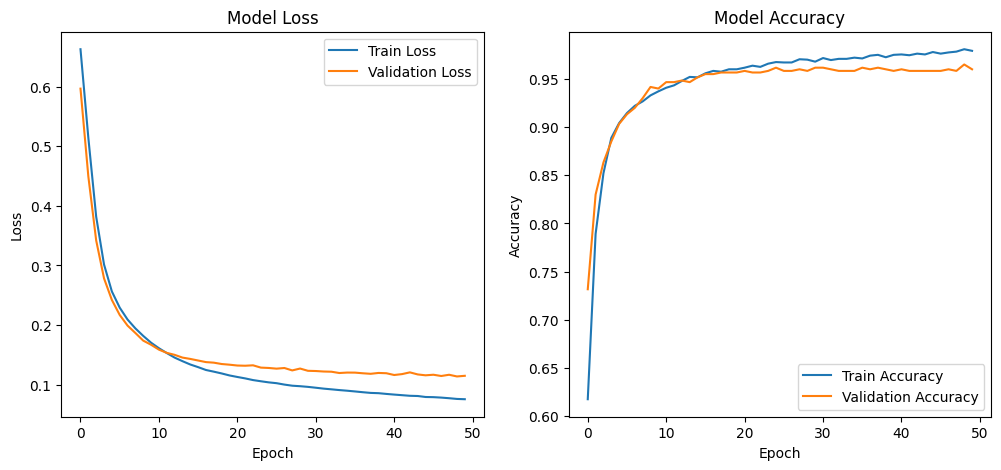

In [12]:
# Plot the training history (loss and accuracy)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training & validation loss values
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training & validation accuracy values
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [13]:
# Print first 10 predictions to verify
print("Predictions:", y_pred[:10].flatten())
print("True Labels:", y_test[:10])

Predictions: [0 0 1 1 1 1 0 0 0 0]
True Labels: [0 0 1 1 1 1 0 0 0 0]
